<h2 align='center'> COVID-19 Analysis </h2>

<hr>

### Importing essential libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly
# import plotly.express as px

### Loading Data

In [2]:
state_df = pd.read_csv('Data/StatewiseTestingDetails.csv')
country_df = pd.read_csv('Data/covid_19_india.csv')

### Inspecting Data ---------- EDA on Covid 19 India Analysis

In [3]:
country_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
country_df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
country_df = country_df.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
country_df.head()
# deleting sno , ConfirmedIndianNational,ConfirmedForeignNational

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


### State-wise Recovery Rate and Mortality Rate

In [6]:
statewise = pd.pivot_table(country_df, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
statewise['Recovery Rate'] = statewise['Cured']*100 / statewise['Confirmed']
statewise['Mortality Rate'] = statewise['Deaths']*100 /statewise['Confirmed']
statewise = statewise.sort_values(by='Confirmed', ascending= False)
statewise

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6113335,5872268,123531,96.056702,2.020681
Kerala,2996094,2877557,13960,96.043615,0.465940
Karnataka,2859595,2784030,35526,97.357493,1.242344
Tamil Nadu,2503481,2435872,33132,97.299400,1.323437
Andhra Pradesh,1908065,1861937,12898,97.582472,0.675973
Uttar Pradesh,1706818,1682130,22656,98.553566,1.327382
West Bengal,1507241,1472132,17834,97.670645,1.183222
Delhi,1434687,1408853,25001,98.199328,1.742610
Chhattisgarh,996359,977893,13462,98.146652,1.351119


### Analysis of Active cases

In [7]:
country_df['Active'] = country_df['Confirmed'] - country_df['Cured'] - country_df['Deaths']
country_df.tail() 

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
16845,2021-07-07,8:00 AM,Telangana,613124,3703,628282,11455
16846,2021-07-07,8:00 AM,Tripura,63964,701,68612,3947
16847,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882,1538
16848,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818,2032
16849,2021-07-07,8:00 AM,West Bengal,1472132,17834,1507241,17275


In [8]:
#converting into date-time format
country_df['Date'] = pd.to_datetime(country_df['Date']) 
country_df.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


In [9]:
#top 15 states 
country_df['State/UnionTerritory'].value_counts().head(15)

Kerala               525
Delhi                493
Rajasthan            492
Uttar Pradesh        491
Haryana              491
Tamil Nadu           488
Ladakh               488
Jammu and Kashmir    486
Maharashtra          486
Punjab               486
Karnataka            486
Andhra Pradesh       483
Uttarakhand          480
Odisha               479
West Bengal          477
Name: State/UnionTerritory, dtype: int64

####  Active cases in top 7 states during the period of time 

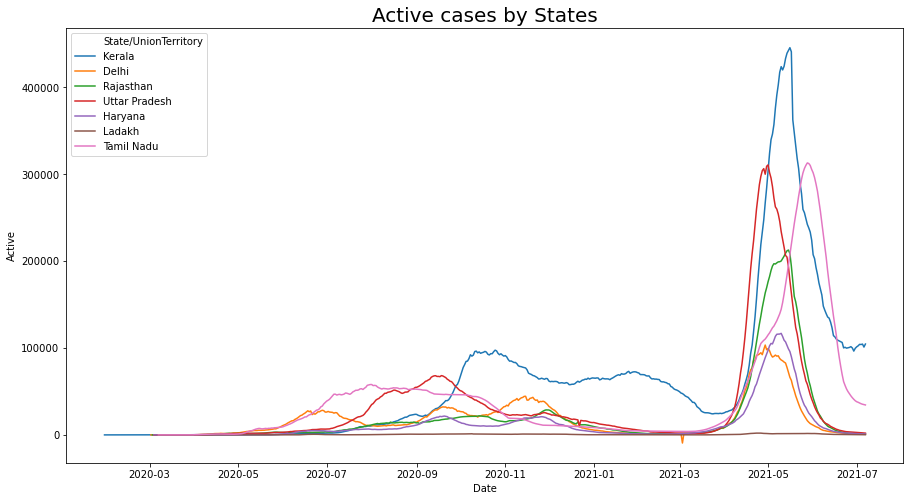

In [10]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=country_df[country_df['State/UnionTerritory'].isin(['Kerala','Delhi','Rajasthan','Uttar Pradesh','Haryana','Tamil Nadu','Ladakh'])],
                x='Date',y='Active', hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()

- Kerela has the highest number of active cases in month of may to june 
- Tamil Nadu and Uttar-pradesh are second highest 
- Delhi has minimum number of cases 

In [11]:
india_cases = country_df[country_df['Date'] == country_df['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)
india_cases.head(10)

,Time,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,8:00 AM,7343,128,7487,16
Andhra Pradesh,8:00 AM,1861937,12898,1908065,33230
Arunachal Pradesh,8:00 AM,34525,181,37879,3173
Assam,8:00 AM,493306,4717,522267,24244
Bihar,8:00 AM,711913,9612,722746,1221
Chandigarh,8:00 AM,60837,809,61752,106
Chhattisgarh,8:00 AM,977893,13462,996359,5004
Dadra and Nagar Haveli and Daman and Diu,8:00 AM,10532,4,10575,39
Delhi,8:00 AM,1408853,25001,1434687,833


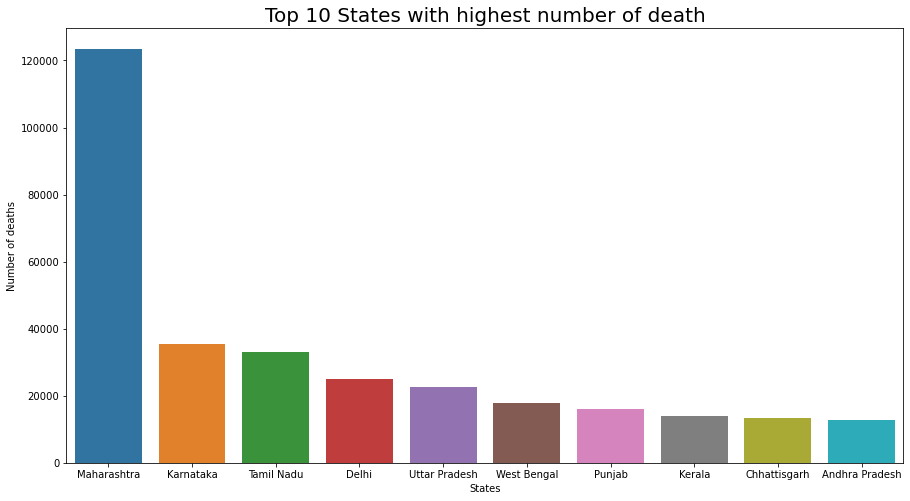

In [12]:
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index).set(xlabel='States', ylabel='Number of deaths')
plt.show()

- Maharastra has the highest number of death rate

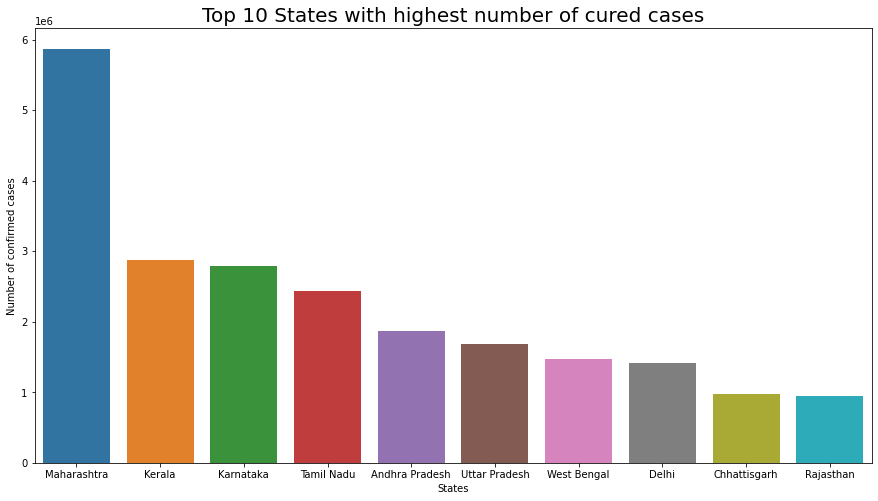

In [13]:
top_10_cured_cases = india_cases.sort_values('Cured',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_cases.iloc[:10],y=top_10_cured_cases.Cured,x=top_10_cured_cases.index).set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

- Maharastra has highest number of cured cases also

### Analysis of StateWise Testing

In [14]:
state_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [15]:
state_df.shape

(15113, 5)

In [16]:
state_df.isna().sum()

Date               0
State              0
TotalSamples       0
Negative        8456
Positive        9524
dtype: int64

In [17]:
state_df['Positive'] = state_df['Positive'].fillna(0)
# state_df['Positive']=state_testing['Positive'].astype('int')
state_df['Negative'] = state_df['Negative'].fillna(0)

In [18]:
state_df.isna().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [19]:
statewise_testing = pd.pivot_table(state_df, values=['TotalSamples','Positive','Negative'], index='State', aggfunc='max')
statewise_testing['Positive_Case_Rate'] = statewise_testing['Positive']*100 / statewise_testing['TotalSamples']
statewise_testing['Positive_Case_Rate']=round(statewise_testing['Positive_Case_Rate'].astype('int'),2)
statewise_testing = statewise_testing.sort_values(by='TotalSamples', ascending= False)
statewise_testing

,Positive,TotalSamples,Positive_Case_Rate
State,,,
Uttar Pradesh,126722.0,59331655.0,0
Maharashtra,1638961.0,42908288.0,3
Karnataka,264546.0,35152131.0,0
Bihar,90553.0,33875754.0,0
Tamil Nadu,367430.0,33789460.0,1
Gujarat,136004.0,24033168.0,0
Kerala,932639.0,23768112.0,3
Andhra Pradesh,235525.0,22524187.0,1
Delhi,151928.0,21916160.0,0


### Analysis of Covid Vaccine State-Wise

In [21]:
vaccination = pd.read_csv("Data/covid_vaccine_statewise.csv")
vaccination.head(10)

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,132784.0,233143.0,38.0,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,193899.0,355402.0,80.0,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,267856.0,491049.0,103.0,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,296283.0,538647.0,128.0,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,444137.0,832766.0,201.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,1277104.0


In [22]:
vaccination.shape

(6699, 18)

In [23]:
vaccination.isnull().sum()/100

Updated On                              0.00
State                                   0.00
Total Doses Administered                3.35
Total Sessions Conducted                3.36
Total Sites                             3.36
First Dose Administered                 3.36
Second Dose Administered                3.36
Male(Individuals Vaccinated)            3.36
Female(Individuals Vaccinated)          3.36
Transgender(Individuals Vaccinated)     3.36
Total Covaxin Administered              3.36
Total CoviShield Administered           3.36
Total Sputnik V Administered           49.62
AEFI                                   25.19
18-45 years (Age)                      25.22
45-60 years (Age)                      25.21
60+ years (Age)                        25.21
Total Individuals Vaccinated            3.36
dtype: float64

In [24]:
# removing columns having most null values
vaccination = vaccination.drop(['Total Sputnik V Administered','AEFI', '18-45 years (Age)','45-60 years (Age)','60+ years (Age)'], axis=1)
vaccination.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0


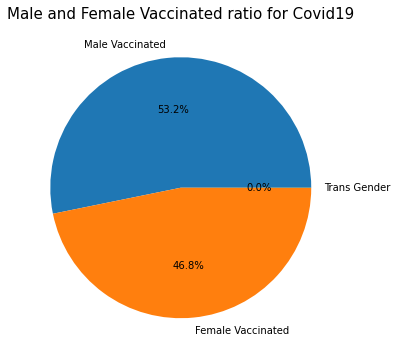

In [41]:
male = vaccination["Male(Individuals Vaccinated)"].sum() 
female = vaccination["Female(Individuals Vaccinated)"].sum()  
trans = vaccination["Transgender(Individuals Vaccinated)"].sum()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(labels=["Male Vaccinated","Female Vaccinated","Trans Gender"],x=[male,female,trans], autopct="%.1f%%")
plt.title("Male and Female Vaccinated ratio for Covid19", size=15)
plt.show()

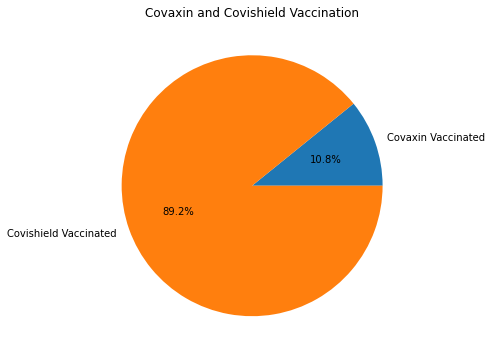

In [42]:
Covaxin = vaccination["Total Covaxin Administered"].sum() 
Covishield = vaccination["Total CoviShield Administered"].sum() 

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(labels=["Covaxin Vaccinated","Covishield Vaccinated"],
        x=[Covaxin,Covishield], autopct="%.1f%%")
plt.title("Covaxin and Covishield Vaccination")
plt.show()

In [33]:
v=vaccination[vaccination.State!='India']
v.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace = True)

States_grouped=v.groupby('State')['Total'].sum().to_frame('Total')
States_grouped=States_grouped.sort_values('Total',ascending=False).head(5)
States_grouped

C:\Users\RAJEEV\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Total
State,
Maharashtra,1.717369e+09
Uttar Pradesh,1.526352e+09
Rajasthan,1.390911e+09
Gujarat,1.320173e+09
West Bengal,1.126840e+09


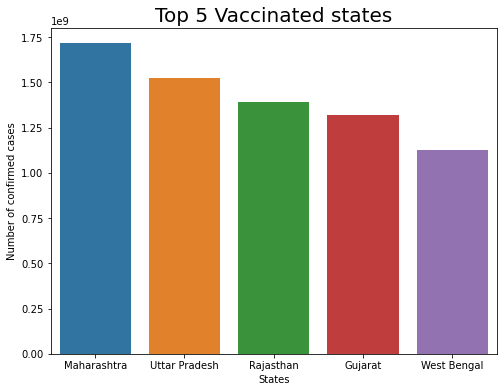

In [34]:
fig=plt.figure(figsize=(8,6))
plt.title("Top 5 Vaccinated states", size=20)
plt.xlabel("states")
plt.ylabel("Vaccination number")
x=sns.barplot(data=States_grouped.iloc[:10],y=States_grouped.Total,x=States_grouped.index).set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

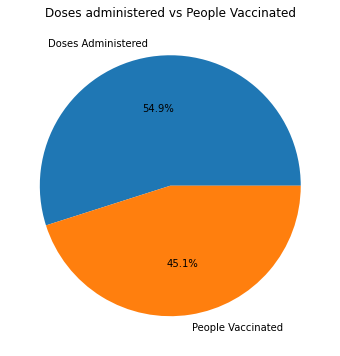

In [44]:
Doses = vaccination["Total Doses Administered"].sum() 
Vaccinated = vaccination["Total Individuals Vaccinated"].sum()  

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(labels=["Doses Administered","People Vaccinated"],x=[Doses,Vaccinated], autopct="%.1f%%")
plt.title("Doses administered vs People Vaccinated")
plt.show()

<h2 align='center'> THANK YOU </h2>

<hr>
